In [1]:
import os
import numpy as np
import pandas as pd

from subprocess import check_output
print(check_output(['ls', './data/']).decode('utf8'))

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import json

yelp_academic_dataset_business.json
yelp_academic_dataset_review.json



In [2]:
from sklearn.feature_extraction.text import CountVectorizer
review_file = 'data/yelp_academic_dataset_review.json'
biz_file = 'data/yelp_academic_dataset_business.json'

with open(review_file) as f:
    js = []
    for i in range(1000):
        js.append(json.loads(f.readline()))

review_df = pd.DataFrame(js)

# take a look at the first five reviews
review_df[['text']][:5]


                                                text
0  My wife took me here on my birthday for breakf...
1  I have no idea why some people give bad review...
2  love the gyro plate. Rice is so good and I als...
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4  General Manager Scott Petello is a good egg!!!...

This dataset has more than 160,000 rows of data, it is basically impossible for me to build a model with the full dataset. So, I used only the first 1000 examples for practice purpose.

In [3]:
#bag-of-words
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b') # unigram
bigram_converter = CountVectorizer(ngram_range=(2, 2),
                                   token_pattern='(?u)\\b\\w+\\b')
trigram_converter = CountVectorizer(ngram_range=(3, 3),
                                    token_pattern='(?u)\\b\\w+\\b')

bow_converter.fit(review_df['text'])
words = bow_converter.get_feature_names()

bigram_converter.fit(review_df['text'])
bigrams = bigram_converter.get_feature_names()

trigram_converter.fit(review_df['text'])
trigrams = trigram_converter.get_feature_names()

print(len(words), len(bigrams), len(trigrams))


9925 65263 111809


Bag of words (words frequency counting ) is just a special case of the n-gram method, i.e., uni-gram. As the number of grams increases, the number of features increases drastically, that is why we seldomly use grams larget than 3 (trigram).

In [4]:
print(words[:5])
print('='*80)
print(bigrams[-5:])
print('='*80)
print(trigrams[-5:])


['0', '00', '000', '00pm', '02']
['zucchini the', 'zucchini was', 'zuch and', 'zupas officially', 'zuzus room']
['zucchini the zucchini', 'zucchini was really', 'zuch and asparagus', 'zupas officially opens', 'zuzus room service']


In [6]:

print(" unique unigrams={}\n unique bigrams={}".
      format(len(set(words)), len(set(bigrams))))

len(set(trigrams))

 unique unigrams=9925
 unique bigrams=65263


111809

## Use of Stemming

## Use `nltk`

In [7]:
import nltk

stemmer = nltk.stem.porter.PorterStemmer()
stemmer.stem('zeroes')

'zero'

## Use `spacy`

In [8]:
import spacy

# use the first 10 reviews to exploration
review_df2 = review_df[:10]

nlp = spacy.load('en')
doc_df = review_df2['text'].apply(nlp)

for doc in doc_df[4]:
    print([doc.text, doc.pos_, doc.tag_])


['General', 'PROPN', 'NNP']
['Manager', 'PROPN', 'NNP']
['Scott', 'PROPN', 'NNP']
['Petello', 'PROPN', 'NNP']
['is', 'VERB', 'VBZ']
['a', 'DET', 'DT']
['good', 'ADJ', 'JJ']
['egg', 'NOUN', 'NN']
['!', 'PUNCT', '.']
['!', 'PUNCT', '.']
['!', 'PUNCT', '.']
['Not', 'ADV', 'RB']
['to', 'PART', 'TO']
['go', 'VERB', 'VB']
['into', 'ADP', 'IN']
['detail', 'NOUN', 'NN']
[',', 'PUNCT', ',']
['but', 'CCONJ', 'CC']
['let', 'VERB', 'VB']
['me', 'PRON', 'PRP']
['assure', 'VERB', 'VB']
['you', 'PRON', 'PRP']
['if', 'ADP', 'IN']
['you', 'PRON', 'PRP']
['have', 'VERB', 'VBP']
['any', 'DET', 'DT']
['issues', 'NOUN', 'NNS']
['(', 'PUNCT', '-LRB-']
['albeit', 'ADP', 'IN']
['rare', 'ADJ', 'JJ']
[')', 'PUNCT', '-RRB-']
['speak', 'VERB', 'VBP']
['with', 'ADP', 'IN']
['Scott', 'PROPN', 'NNP']
['and', 'CCONJ', 'CC']
['treat', 'VERB', 'VB']
['the', 'DET', 'DT']
['guy', 'NOUN', 'NN']
['with', 'ADP', 'IN']
['some', 'DET', 'DT']
['respect', 'NOUN', 'NN']
['as', 'ADP', 'IN']
['you', 'PRON', 'PRP']
['state', 'VERB'

In [9]:
# noun chunking
print([chunk for chunk in doc_df[4].noun_chunks])

[General Manager Scott Petello, a good egg, detail, me, you, you, any issues, Scott, the guy, some respect, you, your case, I, you, I, I, Mistakes, it, we, them, Thanks, Scott, his awesome staff, You, a customer, life]


## Use `textblob`

In [10]:
# nltk.download('punkt')

from textblob import TextBlob

blob_df = review_df2['text'].apply(TextBlob)

blob_df[4].tags

[('General', 'NNP'),
 ('Manager', 'NNP'),
 ('Scott', 'NNP'),
 ('Petello', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('egg', 'NN'),
 ('Not', 'RB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('into', 'IN'),
 ('detail', 'NN'),
 ('but', 'CC'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('assure', 'VB'),
 ('you', 'PRP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('any', 'DT'),
 ('issues', 'NNS'),
 ('albeit', 'IN'),
 ('rare', 'NN'),
 ('speak', 'NN'),
 ('with', 'IN'),
 ('Scott', 'NNP'),
 ('and', 'CC'),
 ('treat', 'VB'),
 ('the', 'DT'),
 ('guy', 'NN'),
 ('with', 'IN'),
 ('some', 'DT'),
 ('respect', 'NN'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('state', 'NN'),
 ('your', 'PRP$'),
 ('case', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ("'d", 'MD'),
 ('be', 'VB'),
 ('surprised', 'VBN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('walk', 'VB'),
 ('out', 'RP'),
 ('totally', 'RB'),
 ('satisfied', 'JJ'),
 ('as', 'IN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('Like', 'IN'),
 ('

In [11]:
print([np for np in blob_df[4].noun_phrases])

['general manager', 'scott petello', 'good egg', 'scott', "n't walk", '... ..', 'mistakes', 'thanks', 'scott', 'awesome staff', '... ... ...']


## Tf-Idf (term frequency-inverse documents frequency)

- $bow(w, d)$ = #times words $w$ apprears in document d
- $tf-idf(w, d)$ = $bow(w, d)*N$/(# documents in which word $w$ appears)

> $N$ is the total number of documents

In [12]:
# load datasets

with open(biz_file) as f:
    biz_df = pd.DataFrame([json.loads(x) for x in f.readlines()])

with open(review_file) as f:
    review_df = pd.DataFrame([json.loads(x) for x in f.readlines()])
   

In [13]:
two_biz = biz_df[biz_df.apply(lambda x: 'Nightlife' in x['categories'] or 'Restaurants' in x['categories'], axis=1)]

# combine two tables together
twobiz_reviews = two_biz.merge(review_df, on='business_id', how='inner')

# get features
twobiz_reviews = twobiz_reviews[['business_id', 'name', 'starts_y',
                                 'text', 'categories']]

# get target 
twobiz_reviews['target'] = twobiz_reviews.apply(lambda x: 'Nightlife' in x['categories'], axis=1)

In [51]:
# get distribution of data/
nightlife = ['Nightlife' in nt for nt in twobiz_reviews['categories']].count(True)
restaurant = ['Restaurants' in rt for rt in twobiz_reviews['categories']].count(True)

print(f'nightlife={nightlife}, restaurant={restaurant}, ratio={nightlife/restaurant :.3f}')

nightlife=31346, restaurant=153886, ratio=0.204


In our data, the number of observations that contain *restaurants* is only 1/5 of those contain *nightlife*. To make a fast illustration, we can downsample the data and while still keep the imbalanced feature of the data. Hence, we will sample about 10% of observations from the 'Restaurants' observations, and 2% from the 'Nightlife' one.

In [88]:
nightlife = twobiz_reviews[twobiz_reviews.apply(lambda x: "Nightlife" in x['categories'], axis=1)]
nightlife_set = nightlife.sample(frac=0.1, random_state=42)
restaurants = twobiz_reviews[twobiz_reviews.apply(lambda x: "Restaurants" in x['categories'], axis=1)]
restaurant_set = restaurants.sample(frac=0.021, random_state=42)

combined_dt = pd.concat([nightlife_set, restaurant_set])


In [87]:
combined_dt.shape

(6367, 23)

In [120]:
from sklearn import model_selection as modelsel
from sklearn import preprocessing as preproc
from sklearn.feature_extraction import text

train_data, test_data = modelsel.train_test_split(combined_dt,
                                                     train_size=0.7,
                                                     random_state=42)
bow_transform = text.CountVectorizer()

X_tr_bow = bow_transform.fit_transform(train_data['text'])
X_ts_bow = bow_transform.transform(test_data['text'])

print(len(bow_transform.vocabulary_))

y_tr = train_data['target']
y_ts = test_data['target']

tfidf_trfm = text.TfidfTransformer(norm=None)

X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_ts_tfidf = tfidf_trfm.transform(X_ts_bow)

X_tr_l2 = preproc.normalize(X_tr_bow, axis=0)
X_ts_l2 = preproc.normalize(X_ts_bow, axis=0)



/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


19076


In [121]:
from sklearn.linear_model import LogisticRegression

def log_clf(X_tr, y_tr, X_ts, y_tt, description):
    m = LogisticRegression().fit(X_tr, y_tr)
    score = m.score(X_ts, y_ts)
    print("Test score with", description, "feature:", score)
    return m

In [123]:
m1 = log_clf(X_tr_bow, y_tr, X_ts_bow, y_ts, 'bow')
m2 = log_clf(X_tr_tfidf, y_tr, X_ts_tfidf, y_ts, 'tf-idf')
m3 = log_clf(X_tr_l2, y_tr, X_ts_l2, y_ts, 'L2-Norm')

Test score with bow feature: 0.7535321821036107


Test score with tf-idf feature: 0.7409733124018838
Test score with L2-Norm feature: 0.7713239141810571


In [133]:
# help(logistic_reg)

param_dist = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = modelsel.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_dist)
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
l2_search = modelsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_dist)
l2_search.fit(X_tr_l2, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
l2_search.cv_results_['mean_test_score']

array([0.56373429, 0.56373429, 0.59088869, 0.7322711 , 0.75830341,
       0.75044883])

In [149]:
tfidf_search = modelsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_dist)
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [150]:
tfidf_search.cv_results_['mean_test_score']

array([0.60008977, 0.77872531, 0.75381508, 0.74842908, 0.74079892,
       0.71992819])

In [151]:
bow_search.cv_results_['mean_test_score']

array([0.56373429, 0.71499102, 0.75740575, 0.74685817, 0.73788151,
       0.73743268])

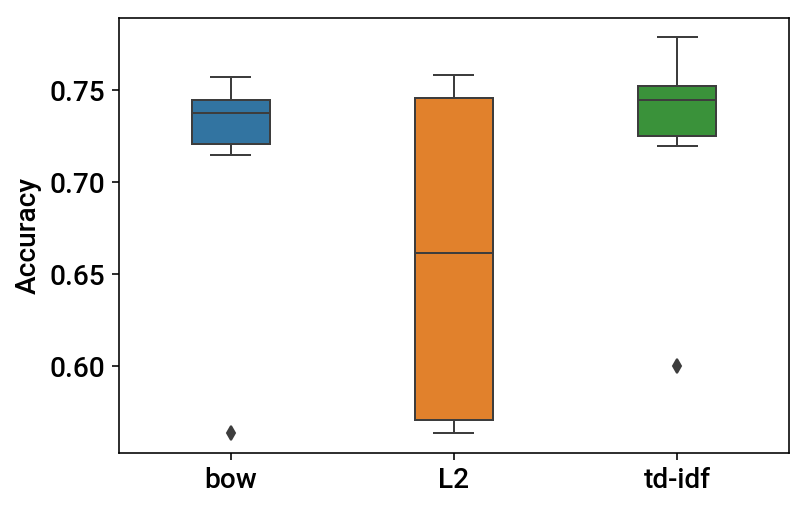

In [152]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                                         'L2': l2_search.cv_results_['mean_test_score'],
                                         'td-idf': tfidf_search.cv_results_['mean_test_score']})

import seaborn as sns

ax = sns.boxplot(data=search_results, width=0.35)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)




For our small text dataset, the tf-idf algorithm seems to work slightly better than the bag-of-words. The L2-norm has the worst accuracy score. Essentially, tf-idf and L2-norm work in a similar manner. They both do column scaling, as a scaler is applied  column-wise to the training data. The only difference is that the scaler tf-idf uses can be zero, while a L2-norm is less likely be zero. A disadvantage of L2-norm is the potential effect of outlier.

